<a href="https://colab.research.google.com/github/SARU230/Matplot_lib_for-gromacs/blob/main/viscosity_from_gromacs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

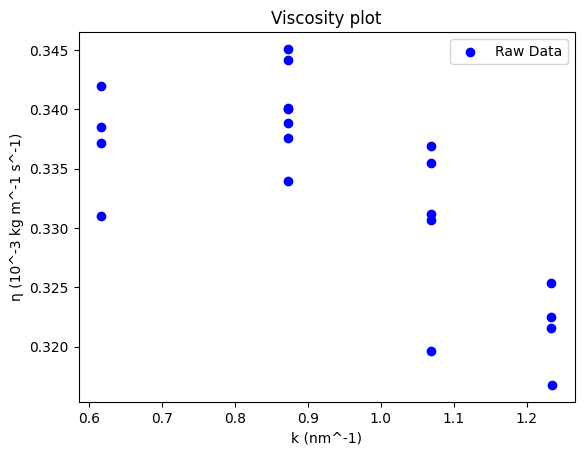

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file (without averaging duplicates)
def load_data(filename):
    X = []
    Y = []
    with open(filename, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith(('#', '@', '&')):  # Skip comments and metadata
                parts = line.split()
                if len(parts) == 2:
                    X.append(float(parts[0]))
                    Y.append(float(parts[1]))
    return np.array(X), np.array(Y)

# Main function
def main():
    # Load data from file
    filename = "visc_k.xvg"  # Replace with your file name
    X, Y = load_data(filename)

    # Plot the raw data
    plt.scatter(X, Y, label="Raw Data", color="blue")
    plt.xlabel("k (nm^-1)")
    plt.ylabel("η (10^-3 kg m^-1 s^-1)")
    plt.legend()
    plt.title("Viscosity plot")
    plt.show()

# Run the program
if __name__ == "__main__":
    main()

Enter the equation number (1, 2, or 3): 2
Fitted viscosity (a0): 0.3478


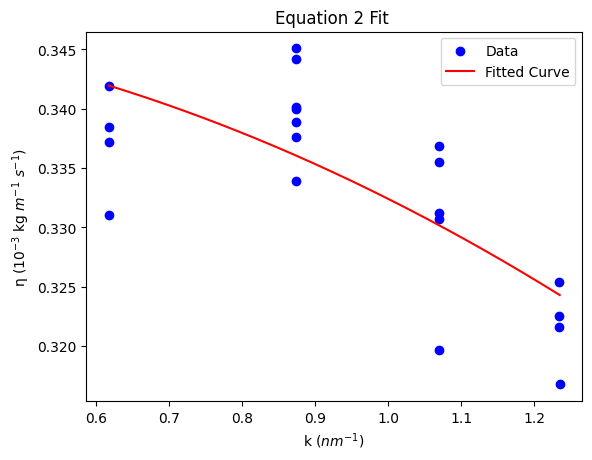

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the equations
def eq1(X, a0, a1, a2):
    return a0 * (1 - a1 * X**2 + a2 * X**3)  # More curvy

def eq2(X, a0, a1):
    return a0 * (1 - a1 * X**2)  # Less curvy

def eq3(X, a0, a1):
    return a0 * (1 - a1 * X)  # Linear

# Load data from file (without averaging duplicates)
def load_data(filename):
    X = []
    Y = []
    with open(filename, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith(('#', '@', '&')):  # Skip comments and metadata
                parts = line.split()
                if len(parts) == 2:
                    X.append(float(parts[0]))
                    Y.append(float(parts[1]))
    return np.array(X), np.array(Y)

# Plot the data and fit the selected equation
def fit_and_plot(X, Y, equation_number):
    # Select the equation based on user input
    if equation_number == 1:
        equation = eq1
        initial_guess = [1, 0.1, 0.01]  # Initial guess for a0, a1, a2
    elif equation_number == 2:
        equation = eq2
        initial_guess = [1, 0.1]  # Initial guess for a0, a1
    elif equation_number == 3:
        equation = eq3
        initial_guess = [1, 0.1]  # Initial guess for a0, a1
    else:
        raise ValueError("Invalid equation number. Choose 1, 2, or 3.")

    # Perform curve fitting
    popt, _ = curve_fit(equation, X, Y, p0=initial_guess)

    # Print the viscosity value (a0)
    print(f"Fitted viscosity (a0): {popt[0]:.4f}")

    # Plot the original data
    plt.scatter(X, Y, label="Data", color="blue")

    # Plot the fitted curve
    X_fit = np.linspace(min(X), max(X), 500)
    Y_fit = equation(X_fit, *popt)
    plt.plot(X_fit, Y_fit, label="Fitted Curve", color="red")

    # Add labels and legend
    plt.xlabel("k ($nm^{-1}$)")
    plt.ylabel("η ($10^{-3}$ kg $m^{-1}$ $s^{-1}$)")
    plt.legend()
    plt.title(f"Equation {equation_number} Fit ")
    plt.show()

# Main function
def main():
    # Load data from file
    filename = "visc_k.xvg"  # Replace with your file name
    X, Y = load_data(filename)

    # Ask the user to select an equation
    equation_number = int(input("Enter the equation number (1, 2, or 3): "))

    # Fit and plot the selected equation
    fit_and_plot(X, Y, equation_number)

# Run the program
if __name__ == "__main__":
    main()

AVERAGE VISCOSITY


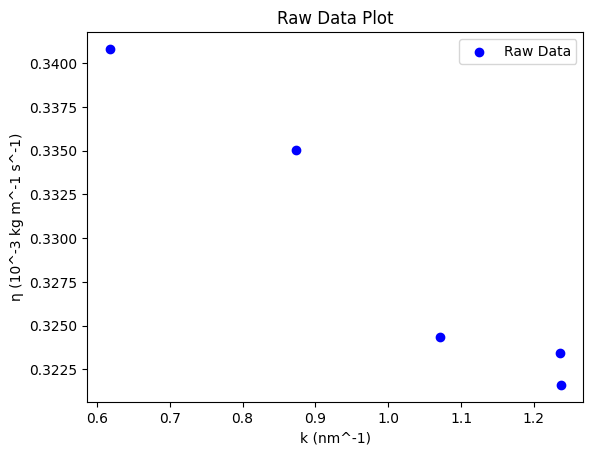

In [ ]:
##import numpy as np
import matplotlib.pyplot as plt

# Load data from file and handle duplicates
def load_data(filename):
    data = {}
    with open(filename, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith(('#', '@', '&')):  # Skip comments and metadata
                parts = line.split()
                if len(parts) == 2:
                    x = float(parts[0])
                    y = float(parts[1])
                    if x in data:
                        data[x].append(y)
                    else:
                        data[x] = [y]

    # Average Y values for duplicate X values
    X = np.array(sorted(data.keys()))
    Y = np.array([np.mean(data[x]) for x in X])
    return X, Y

# Main function
def main():
    # Load data from file
    filename = "visc_k.xvg"  # Replace with your file name
    X, Y = load_data(filename)

    # Plot the raw data
    plt.scatter(X, Y, label="Raw Data", color="blue")
    plt.xlabel("k (nm^-1)")
    plt.ylabel("η (10^-3 kg m^-1 s^-1)")
    plt.legend()
    plt.title("Raw Data Plot")
    plt.show()

# Run the program
if __name__ == "__main__":
    main()

Enter the equation number (1, 2, or 3): 2
Fitted viscosity (a0): 0.3466


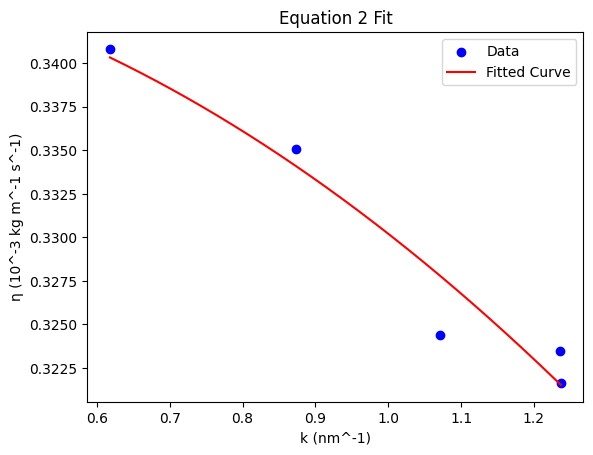

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the equations
def eq1(X, a0, a1, a2):
    return a0 * (1 - a1 * X**2 + a2 * X**3)  # More curvy

def eq2(X, a0, a1):
    return a0 * (1 - a1 * X**2)  # Less curvy

def eq3(X, a0, a1):
    return a0 * (1 - a1 * X)  # Linear

# Load data from file and handle duplicates
def load_data(filename):
    data = {}
    with open(filename, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith(('#', '@', '&')):  # Skip comments and metadata
                parts = line.split()
                if len(parts) == 2:
                    x = float(parts[0])
                    y = float(parts[1])
                    if x in data:
                        data[x].append(y)
                    else:
                        data[x] = [y]

    # Average Y values for duplicate X values
    X = np.array(sorted(data.keys()))
    Y = np.array([np.mean(data[x]) for x in X])
    return X, Y

# Plot the data and fit the selected equation
def fit_and_plot(X, Y, equation_number):
    # Select the equation based on user input
    if equation_number == 1:
        equation = eq1
        initial_guess = [1, 0.1, 0.01]  # Initial guess for a0, a1, a2
    elif equation_number == 2:
        equation = eq2
        initial_guess = [1, 0.1]  # Initial guess for a0, a1
    elif equation_number == 3:
        equation = eq3
        initial_guess = [1, 0.1]  # Initial guess for a0, a1
    else:
        raise ValueError("Invalid equation number. Choose 1, 2, or 3.")

    # Perform curve fitting
    popt, _ = curve_fit(equation, X, Y, p0=initial_guess)

    # Print the viscosity value (a0)
    print(f"Fitted viscosity (a0): {popt[0]:.4f}")

    # Plot the original data
    plt.scatter(X, Y, label="Data", color="blue")

    # Plot the fitted curve
    X_fit = np.linspace(min(X), max(X), 500)
    Y_fit = equation(X_fit, *popt)
    plt.plot(X_fit, Y_fit, label="Fitted Curve", color="red")

    # Add labels and legend
    plt.xlabel("k (nm^-1)")
    plt.ylabel("η (10^-3 kg m^-1 s^-1)")
    plt.legend()
    plt.title(f"Equation {equation_number} Fit")
    plt.show()

# Main function
def main():
    # Load data from file
    filename = "visc_k.xvg"  # Replace with your file name
    X, Y = load_data(filename)

    # Ask the user to select an equation
    equation_number = int(input("Enter the equation number (1, 2, or 3): "))

    # Fit and plot the selected equation
    fit_and_plot(X, Y, equation_number)

# Run the program
if __name__ == "__main__":
    main()